<a href="https://colab.research.google.com/github/JairoRotava/lindolfo/blob/master/Teste_caio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instala o yfinance para garantir que as biblioteca funcionem
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b9d3b868942282eae1b010e61dbe10304c89838560d94128b298236162dd8e42
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [4]:
# Clona meu repositorio com o codigo desenvolvido
!git clone  https://github.com/JairoRotava/lindolfo.git

Cloning into 'lindolfo'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 6), reused 31 (delta 6), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [7]:
# Entra na pasta clonada
cd lindolfo/

/content/lindolfo


In [8]:
ls

'avalia acao e opcao.ipynb'   bovespa.py   main.py   teste.ipynb   yfinance/


In [0]:
# Coloque o nome das acoes e incial das opcoes aqui
papel_acao = 'PETR4'
papel_opcoes = 'PETRF1'

In [0]:
# Carrega bibliotecas
import bovespa
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import re
import logging
import matplotlib. pyplot as plt 

In [0]:
# Informacao para logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Dias que podem ser utilizados para filtrar opcoes
ontem = datetime.today() - timedelta(days=1)
hoje = datetime.today()

# Qual data deve ser utilizada no filtro
data_negociacao = hoje


# Pega acao e opcao do site do Caio
acao = bovespa.get_values(papel_acao)
opcao = bovespa.get_values(papel_opcoes, exact=False)

In [12]:
# Faz processamento da acao e opcao
aval_opcoes = bovespa.process(acao, opcao, filter_date = data_negociacao)
# Coloca em ordem crescente de lucro
opcoes_ordenadas_lucro = aval_opcoes.sort_values('lucro %', ascending=False)
# Mostra tabela das opçoes
display(opcoes_ordenadas_lucro[:10])

,acao,tipo acao,valor acao,opcao,tipo_opcao,data negociacao,valor opcao,strike,volume,lucro %
26,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF178 PETR PN 17,80",PN,07/05,1.45,17.80,0.0,8.169014
25,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF175 PETRE PN 17,55",PN,07/05,1.52,17.55,0.0,7.436620
28,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF180 PETRE PN 18,05",PN,07/05,1.30,18.05,0.0,7.323944
24,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF173 PETR PN 17,30",PN,07/05,1.72,17.30,149.0,7.154930
30,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF183 PETR PN 18,30",PN,07/05,1.21,18.30,0.0,6.816901
22,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF170 PETRE PN 17,05",PN,07/05,1.87,17.05,111.0,6.591549
31,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF185 PETRE PN 18,55",PN,07/05,1.10,18.55,0.0,6.197183
21,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF168 PETR PN 16,80",PN,07/05,2.03,16.80,0.0,6.084507
32,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF188 PETR PN 18,80",PN,07/05,0.98,18.80,0.0,5.521127
34,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF190 PETRE PN 19,05",PN,07/05,0.90,19.05,7.0,5.070423


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


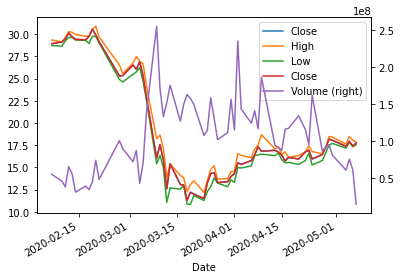

In [13]:
# Aqui usa o yahoo finance para pegar historico da acao. Utiliza versao modificada
# (no git) pois a original da pau com algumas acoes brasileiras

# O ticker precisa de + .SA para funcionar - representa bovespa
ticker = yf.Ticker( papel_acao + '.SA')
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
hist = ticker.history(period='3mo')

# Mostra grafico
ax = plt.gca()
hist.plot(y=['Close', 'High', 'Low', 'Close'], ax=ax)
hist.plot(secondary_y=True, y='Volume', ax=ax)
plt.show()